# 8.1 使用pandas操作csv文件

In [1]:
import pandas as pd
#使用pandas读取csv文件
data=pd.read_csv('./data/test.csv')
print(data)
# 在DataFrame中增加一列：
data['five'] = [100,200,300,400,500,600]
print('打印前5行：')
print(data.head())
print('查看数据的行，以对象返回:')
print(data.index) 
print('查看数据的列键')
 
print('查看five这一列的数据')
print(data.loc[:,['five']])
print('查看数据的行数和列数')
print(data.shape)

     A  B    C
0  1.0  2  3.0
1  2.0  3  4.0
2  3.0  4  5.0
3  4.0  5  6.0
4  NaN  6  7.0
5  6.0  7  NaN
打印前5行：
     A  B    C  five
0  1.0  2  3.0   100
1  2.0  3  4.0   200
2  3.0  4  5.0   300
3  4.0  5  6.0   400
4  NaN  6  7.0   500
查看数据的行，以对象返回:
RangeIndex(start=0, stop=6, step=1)
查看数据的列键
查看five这一列的数据
   five
0   100
1   200
2   300
3   400
4   500
5   600
查看数据的行数和列数
(6, 4)


In [2]:
print(data.describe())
# 默认统计数值型数据每列数据平均值，标准差，最大值，最小值，25%，50%，75%比例。

              A         B         C        five
count  5.000000  6.000000  5.000000    6.000000
mean   3.200000  4.500000  5.000000  350.000000
std    1.923538  1.870829  1.581139  187.082869
min    1.000000  2.000000  3.000000  100.000000
25%    2.000000  3.250000  4.000000  225.000000
50%    3.000000  4.500000  5.000000  350.000000
75%    4.000000  5.750000  6.000000  475.000000
max    6.000000  7.000000  7.000000  600.000000


In [3]:
# 某一列的最大值，最小值，排序
print(data["five"].max())

print(data["A"].min())


# 求均值（会自动过滤掉  那些有缺失值的数据，进而求平均值）
print(data["A"].mean())


print(data.sort_values("A",inplace=False))
#第一个参数指排序的字段（默认升序），第二个参数是否替换data本身的数据(新生成一个DataFrame，并让data指向ta)


# 第三个参数——升降序
print(data.sort_values("A",inplace=False,ascending=False))
print(data)


600
1.0
3.2
     A  B    C  five
0  1.0  2  3.0   100
1  2.0  3  4.0   200
2  3.0  4  5.0   300
3  4.0  5  6.0   400
5  6.0  7  NaN   600
4  NaN  6  7.0   500
     A  B    C  five
5  6.0  7  NaN   600
3  4.0  5  6.0   400
2  3.0  4  5.0   300
1  2.0  3  4.0   200
0  1.0  2  3.0   100
4  NaN  6  7.0   500
     A  B    C  five
0  1.0  2  3.0   100
1  2.0  3  4.0   200
2  3.0  4  5.0   300
3  4.0  5  6.0   400
4  NaN  6  7.0   500
5  6.0  7  NaN   600


In [4]:
# 通过值来选择：
print(data < 5)
data[data<5] = 0 # 将所有小于5的元素设置为0
print(data)

       A      B      C   five
0   True   True   True  False
1   True   True   True  False
2   True   True  False  False
3   True  False  False  False
4  False  False  False  False
5  False  False  False  False
     A  B    C  five
0  0.0  0  0.0   100
1  0.0  0  0.0   200
2  0.0  0  5.0   300
3  0.0  5  6.0   400
4  NaN  6  7.0   500
5  6.0  7  NaN   600


In [5]:
print(data.drop(0,axis=0)) #删除行，注意原数据不变，返回一个新数据
print(data)

     A  B    C  five
1  0.0  0  0.0   200
2  0.0  0  5.0   300
3  0.0  5  6.0   400
4  NaN  6  7.0   500
5  6.0  7  NaN   600
     A  B    C  five
0  0.0  0  0.0   100
1  0.0  0  0.0   200
2  0.0  0  5.0   300
3  0.0  5  6.0   400
4  NaN  6  7.0   500
5  6.0  7  NaN   600


In [6]:
# 处理“空数据”
# 可以根据需求将某些值drop掉 axis=0 表示去掉有空数据的行
print(data.dropna(axis=0))

# 可以根据需求，去掉在某些列（subset=）上为空的数据的行
print(data.dropna(axis=0,subset=["A"]))

# 可以根据需求去掉某些存在 空数据的  某些列
print(data.dropna(axis=1))


#可以填充缺失数据：fillna()函数，inplace参数控制返回新对象还是就地修改
print(data.fillna(0, inplace = False))
print(data)

     A  B    C  five
0  0.0  0  0.0   100
1  0.0  0  0.0   200
2  0.0  0  5.0   300
3  0.0  5  6.0   400
     A  B    C  five
0  0.0  0  0.0   100
1  0.0  0  0.0   200
2  0.0  0  5.0   300
3  0.0  5  6.0   400
5  6.0  7  NaN   600
   B  five
0  0   100
1  0   200
2  0   300
3  5   400
4  6   500
5  7   600
     A  B    C  five
0  0.0  0  0.0   100
1  0.0  0  0.0   200
2  0.0  0  5.0   300
3  0.0  5  6.0   400
4  0.0  6  7.0   500
5  6.0  7  0.0   600
     A  B    C  five
0  0.0  0  0.0   100
1  0.0  0  0.0   200
2  0.0  0  5.0   300
3  0.0  5  6.0   400
4  NaN  6  7.0   500
5  6.0  7  NaN   600


In [7]:
#删除一行并写入到原csv文件
data_new=data.drop(0,axis=0)
data_new.to_csv('./data/new_test.csv')

In [8]:
#练习题：给学生三次测试的成绩表，统计每个学生三次成绩的总和及平均分，并添加到最后两列；统计每次测试成绩、学生总分、平均分的平均分，并添加到最后一行
import pandas as pd

students = pd.read_excel('C:/Temp/Students_3.xlsx', index_col='ID')

row_sum = students[['Test_1', 'Test_2', 'Test_3']].sum(axis=1)
row_mean = students[['Test_1', 'Test_2', 'Test_3']].mean(axis=1)

students['Total'] = row_sum
students['Average'] = row_mean
print(students)

col_mean = students[['Test_1', 'Test_2', 'Test_3', 'Total', 'Average']].mean()
col_mean['Name'] = 'Summary'
students = students.append(col_mean, ignore_index=True)
print(students)



           Name  Test_1  Test_2  Test_3  Total    Average
ID                                                       
1   Student_001      62      86      83    231  77.000000
2   Student_002      77      97      78    252  84.000000
3   Student_003      57      96      46    199  66.333333
4   Student_004      57      87      80    224  74.666667
5   Student_005      95      59      87    241  80.333333
6   Student_006      56      97      61    214  71.333333
7   Student_007      64      91      67    222  74.000000
8   Student_008      96      70      48    214  71.333333
9   Student_009      77      73      48    198  66.000000
10  Student_010      90      94      67    251  83.666667
11  Student_011      62      55      63    180  60.000000
12  Student_012      83      76      81    240  80.000000
13  Student_013      68      60      90    218  72.666667
14  Student_014      82      68      98    248  82.666667
15  Student_015      61      67      91    219  73.000000
16  Student_01

# 8.2 回归分析

In [9]:
#scikit-learn是基于Python的一个机器学习库，你可以在scikit-learn库中选择合适的模型，使用它训练数据集并对新数据集作出预测。在使用之前我们同样需要pip install sklearn

In [10]:
#回归通过训练给定的示例即训练集，模型学习到输入特征和输出值之间的映射关系
# 线性回归预测案例
# 线性回归的目标是提取输入变量与输出变量的关联线性模型，这就要求实际输出与线性方程预测的输出的残差平方和最小化。这种方法也别称为最小二乘法。
import sys
import numpy as np
from sklearn.linear_model import LinearRegression#调用线性回归模型 
import sklearn.metrics as sm#调用精度评价
import matplotlib.pyplot as plt#调用作图工具

X = []
y = []
f = open('./data/data_singlevar.txt', 'r')#打开文件
lines = f.readlines()     #一次性按行把所有数据读取出来
for line in lines:       #逐行读取文件
    #print(line)          #打印一行数据
    xt, yt = [float(i) for i in line.split(',')]#逗号分隔字段，并将字段转化为浮点数
    X.append(xt)
    y.append(yt)
print(X)
print(y)

[4.94, -1.58, -4.45, -6.06, -1.22, -3.55, 0.36, -3.24, 1.31, 2.17, 2.94, -0.92, -0.91, 1.24, 1.56, -4.14, 3.75, 4.15, 0.33, 3.41, 2.27, 2.6, 1.06, 1.04, 2.74, -0.71, -2.75, 0.55, -3.45, 1.09, 2.47, -6.35, 1.83, -0.68, -3.83, -2.03, 3.13, 0.92, 4.02, 3.89, -1.81, 3.94, -2.0, 0.54, 0.78, 2.15, 2.55, -0.63, 1.06, -0.36]
[4.37, 1.7, 1.88, 0.56, 2.23, 1.53, 2.99, 0.48, 2.76, 3.99, 3.25, 2.27, 2.0, 4.75, 3.52, 1.39, 4.9, 4.44, 2.72, 4.59, 5.3, 3.43, 2.53, 3.69, 3.1, 2.72, 2.82, 3.53, 1.77, 4.61, 4.24, 1.0, 3.84, 2.42, 0.67, 1.07, 3.19, 4.21, 5.24, 3.94, 2.85, 4.86, 1.31, 3.99, 2.92, 4.72, 3.83, 2.58, 2.89, 1.99]


In [11]:
#建立机器学习模型时，需要用一种方法来验证模型，检查模型是否达到一定的满意度。为了实现这个方法，把数据分成两组：训练集（training dataset）和测试集（testing dataset）。训练集用来建立模型，测试集用来验证模型对未知数据的学习效果。因此，先把数据分为训练集和测试集。
#划分数据为训练集与验证集
num_training = int(0.8*len(X))
num_test = len(X) - num_training
#训练数据,80%的数据是训练数据
X_train = np.array(X[:num_training]).reshape(num_training, 1)
y_train = np.array(y[:num_training])
#测试数据，20%的数据是测试数据
X_test = np.array(X[num_training:]).reshape(num_test, 1)
y_test = np.array(y[num_training:])

In [12]:
#训练模型
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) #用训练数据训练模型
y_predict = linear_regressor.predict(X_train)
#用训练好的模型对测试集上的数据进行预测
y_test_predict = linear_regressor.predict(X_test) #预测输出结果
print('The score of LinearRegressor is:',linear_regressor.score(X_test, y_test))

The score of LinearRegressor is: 0.6751586633878082


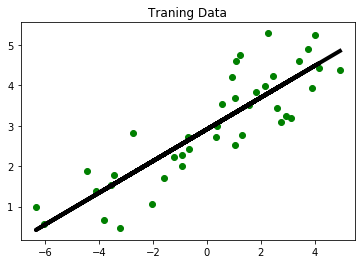

In [13]:
#绘图 对预测数据进行可视化展示
plt.figure()
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, y_predict, color = 'black', linewidth = 4)
plt.title('Traning Data')
plt.show()

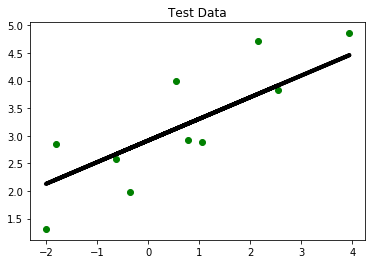

In [14]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_test_predict, color = 'black', linewidth = 4)
plt.title('Test Data')
plt.show()

## 8.2.1 分类

In [15]:
#调用sklearn库的knn算法进行酒的分类。
#KNN分类算法：如果一个样本在特征空间中的K个最相似（即特征空间中最邻近）的样本中的大多数属于某一个类别，则该样本也属于这个类别。
from sklearn.datasets import load_wine
#从datasets中载入酒的数据集
wine_dataset = load_wine()
#实际上load_wine()函数载入的数据集是一种字典对象，它包括keys和values
print(wine_dataset.keys())
#看看数据集中究竟有多少样本和变量
wine_dataset['data'].shape

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


(178, 13)

In [16]:
#生成训练数据集和测试数据集
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#将数据集拆分为训练数据集和测试数据集
x_train, x_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)
#拆分后的数据集
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((133, 13), (45, 13), (45,), (133,))

In [17]:
#使用KNN进行建模
#导入KNN分类模型
from sklearn.neighbors import KNeighborsClassifier
#指定模型的n_neighbors参数值为1
knn = KNeighborsClassifier(n_neighbors = 1)
#接下来我们要使用knn对象中称为拟合(fit)的方法来进行建模，建模的 依据就是x_train和y_train

In [18]:
#拟合knn模型
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
#使用模型对新样本的分类进行预测
#在这之前先用测试数据集对模型进行打分
knn.score(x_test,y_test)

0.7555555555555555

In [20]:
#下面我们用建好的模型对新酒做出分类预测
import numpy as np
#输入新的数据点
x_new = np.array([[13.2, 2.77, 2.51, 18.5, 96.6, 1.04, 2.55, 0.57, 1.47, 6.2, 1.05, 3.33, 820]])
#使用predict()进行预测
prediction = knn.predict(x_new)
#接下来看新酒属于哪个分类
wine_dataset['target_names'][prediction]

array(['class_2'], dtype='<U7')

## 8.2.2 聚类

In [21]:
#聚类是在没有给定划分类别的情况下，根据数据的相似度进行分组的一种方法，分组的原则是组内距离最小化而组间距离最大化。
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# 创建数据集
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本4个特征，共4个簇，
# 簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2],
                  random_state=9)


C:\Users\22814\Anaconda3\envs\tf_1.14\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


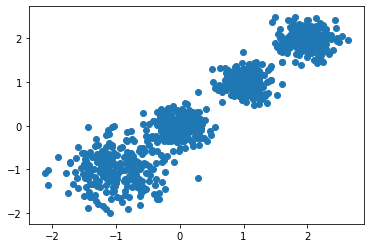

In [22]:
# 数据集可视化
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

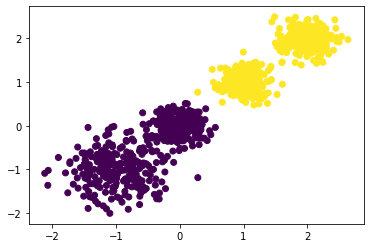

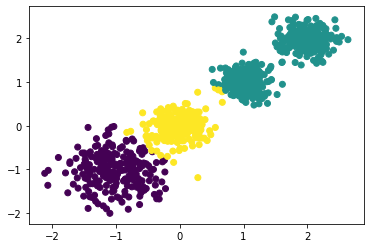

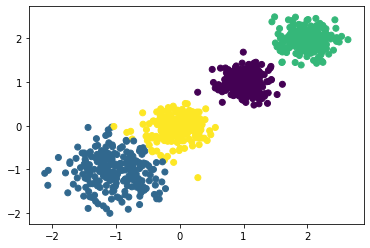

In [23]:
for i in range(2,5):
    y_pred = KMeans(n_clusters=i, random_state=9).fit_predict(X)
# 分别尝试n_cluses=2\3\4,然后查看聚类效果
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.show()

In [24]:
# 用Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X, y_pred))

5924.050613480169
